# Grupamento 1 - Checando e tratando base de dados

In [5]:
#mini projeto deliverable.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Verificando informações da base:

In [7]:
dados = pd.read_csv('/content/kc_house_data.csv')
dados.info() #dados info para verificar a integridade e formação dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
dados #Aqui já verifico deturpações nos banheiros e nas datas.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
dados[['bathrooms','date']].head(8) #números decimais e data gigante em formato object.

,bathrooms,date
0,1.00,20141013T000000
1,2.25,20141209T000000
2,1.00,20150225T000000
3,3.00,20141209T000000
4,2.00,20150218T000000
5,4.50,20140512T000000
6,2.25,20140627T000000
7,1.50,20150115T000000


In [10]:
dados_nid = dados.drop(['id'], axis=1) #removi a coluna de id para realizar minha primeira ideia de análise.

In [11]:
dados_nid[['bathrooms']] = dados_nid[['bathrooms']].round() # usei o round para arrumar a quantidade de banheiros.
dados_nid[['bathrooms']].head(8)

,bathrooms
0,1.0
1,2.0
2,1.0
3,3.0
4,2.0
5,4.0
6,2.0
7,2.0


In [12]:
dados_nid['date'] = dados_nid['date'].str.split('T').str[0] # tratando as datas e corrigindo, retirandos os 0.

In [13]:
dados_nid['date'].head() #verificando correção.

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

In [14]:
dados_nid['date'] = pd.to_datetime(dados_nid['date']) # dados_nid['date'].astype('datetime64[ns]')
 #convertendo object para date_time

dados_nid['date'] #verificando

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [15]:
dados_nid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [16]:
dados_nid['date'] = dados_nid['date'].dt.year # mantendo somente o ano da coluna date.

In [17]:
dados_nid['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

In [18]:
dados_nid['bedrooms'].value_counts() #quantidade de quartos.

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
dados_nid['bathrooms'].value_counts() #quantidade de banheiros.

2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

In [20]:
dados_nid['floors'].value_counts() #quantidade por número de andares.

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [21]:
dados_nid[['price']].value_counts().sort_values() #quantidade por preço.

price    
1278000.0      1
280950.0       1
281500.0       1
281700.0       1
282150.0       1
            ... 
425000.0     150
500000.0     152
550000.0     159
350000.0     172
450000.0     172
Length: 4028, dtype: int64

In [22]:
dados_nid[['waterfront']].value_counts() #quantidade beira-mar.

waterfront
0             21450
1               163
dtype: int64

In [23]:
dados_nid

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Grupamento 2 - Verificando correlações

In [24]:
corr =  dados_nid.corr() #verifiquei as correlações entre as caracteristicas
corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,0.003576,-0.009838,-0.024469,-0.029038,0.005468,-0.022315,-0.004165,0.001364,-0.045589,-0.030387,-0.023823,-0.015687,0.003507,-0.023707,0.001189,-0.029212,0.000270,-0.021734,-0.000085
price,0.003576,1.000000,0.308350,0.518912,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,-0.009838,0.308350,1.000000,0.489609,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.024469,0.518912,0.489609,1.000000,0.701784,0.089988,0.366640,0.065428,0.202647,-0.066685,0.591269,0.599360,0.334909,0.377433,0.069322,-0.144088,0.049235,0.149157,0.497484,0.086952
sqft_living,-0.029038,0.702035,0.576671,0.701784,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.005468,0.089661,0.031703,0.089988,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022315,0.256794,0.175429,0.366640,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.004165,0.266369,-0.006582,0.065428,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.001364,0.397293,0.079532,0.202647,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.045589,0.036362,0.028472,-0.066685,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [25]:
#corr > 0.5
#corr > 0.6
corr > 0.7  #o que mais tem correlação com o preço na venda é sqft_living, bathrooms e grade

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [26]:
area = np.corrcoef(dados['price'],dados['sqft_living']) [0,1] #correlação entre preço e área habitável
area

0.7020350546118003

In [27]:
bath = np.corrcoef(dados['price'],dados['bathrooms']) [0,1] #correlação entre preço e banheiros
bath

0.525137505413962

In [28]:
grad = np.corrcoef(dados['price'],dados['grade']) [0,1] #preço corr qualidade
grad

0.6674342560202365

In [29]:
dados_nid[['price','sqft_living','bathrooms','grade']]

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.0,7
1,538000.0,2570,2.0,7
2,180000.0,770,1.0,6
3,604000.0,1960,3.0,7
4,510000.0,1680,2.0,8
...,...,...,...,...
21608,360000.0,1530,2.0,8
21609,400000.0,2310,2.0,8
21610,402101.0,1020,1.0,7
21611,400000.0,1600,2.0,8


In [30]:
dados_nid[['price']].mean() #verificando a média geral dos preços.

price    540088.141767
dtype: float64

#Grupamento 3 - Coletando média por zipcode

In [31]:
# Separo somente as informações que achei importantes para minha estratégia de análise.
dados_selec = dados_nid[['sqft_living','sqft_living15','yr_built','bathrooms','grade','zipcode','lat','long','date','price']].sort_values('price')

In [32]:
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0
...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0


**Verifico quanto cada casa valorizou-se ao longo do tempo de construção até a venda:**

---



In [33]:
valor_cresc_ano = dados_selec['price']/(dados_selec['date']-dados_selec['yr_built'])
valor_cresc_ano 

1149       1530.612245
15293      1083.333333
465         784.313725
16198      1125.000000
8274       1366.666667
             ...      
1448     891666.666667
4411     428461.538462
9254     529615.384615
3914      95439.189189
7252      74038.461538
Length: 21613, dtype: float64

**Verifico quantos anos a casa tem e crio a coluna de quanto ela valorizou na determinada moeda nesse tempo:**

---



In [34]:
qtd_ano = dados_selec['date']-dados_selec['yr_built'] #criando a coluna com a idade da casa
dados_selec['qtd_anos'] = qtd_ano

In [35]:
dados_selec['valor_cresc'] = valor_cresc_ano # criando a coluna de quanto ela valorizou em moeda por cada ano.
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189


**Crio a coluna de quanto vale o metro ² de cada casa**

---



In [36]:
dados_selec['price_m2'] = dados_selec['price']/dados_selec['sqft_living']
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725,186.046512
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000,110.958904
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667,95.348837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667,668.750000
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462,605.434783
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615,696.157735
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189,703.436255


**Verifico a média de preços do metro por zipcode**

---



In [37]:
# preço médio do metro² por zipcode
medi_zipcode = dados_selec.groupby(['zipcode'])['price_m2'].agg('mean')
medi_zipcode = pd.concat([medi_zipcode], axis=1, ignore_index=True) #crio o DF com as médias 
medi_zipcode.columns = ['mean_zip'] #crio a coluna com a média dos zipcode.
medi_zipcode = medi_zipcode.reset_index() #crio a coluna com os zipcode.

In [38]:
medi_zipcode#verifico o DF com as médias por zipcode.

,zipcode,mean_zip
0,98001,151.387938
1,98002,151.174091
2,98003,157.113414
3,98004,475.435611
4,98005,314.929231
...,...,...
65,98177,292.918745
66,98178,189.172528
67,98188,169.007306
68,98198,178.428610


In [39]:
#crio a coluna no df principal com as médias por cada zip code usando a função map.
dados_selec['mean_zip'] = dados_selec.zipcode.map(medi_zipcode.set_index('zipcode')['mean_zip']) 

In [40]:
medi_zipcode[(medi_zipcode['zipcode'] == 98022)]  #pego o zipcode do head da célula abaixo pra ver se o map funcionou.

,zipcode,mean_zip
12,98022,181.80644


In [41]:
dados_selec.head(2) #Bingo! O mean_zip mapeado com sucesso.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299,181.806440
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000,175.372532


In [42]:
dados_selec[(dados_selec['zipcode'] == 98199)] #verificando o zipcode mais caro.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip
4708,880,1360,1945,1.0,7,98199,47.6475,-122.397,2015,323000.0,70,4614.285714,367.045455,376.546345
3900,880,1010,1945,1.0,7,98199,47.6475,-122.397,2014,330000.0,69,4782.608696,375.000000,376.546345
274,1080,1440,1954,2.0,7,98199,47.6601,-122.400,2014,331000.0,60,5516.666667,306.481481,376.546345
17377,900,1570,1945,1.0,7,98199,47.6485,-122.397,2015,334000.0,70,4771.428571,371.111111,376.546345
8458,1010,1500,2003,2.0,7,98199,47.6515,-122.400,2014,340000.0,11,30909.090909,336.633663,376.546345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,3840,3280,1939,3.0,10,98199,47.6388,-122.406,2015,2152500.0,76,28322.368421,560.546875,376.546345
19323,3080,4120,1996,4.0,11,98199,47.6321,-122.393,2014,2160000.0,18,120000.000000,701.298701,376.546345
11620,4590,2920,1928,3.0,11,98199,47.6453,-122.410,2015,2795000.0,87,32126.436782,608.932462,376.546345
20535,4470,2570,2010,4.0,11,98199,47.6387,-122.405,2014,2950000.0,4,737500.000000,659.955257,376.546345


#Grupamento 4 - Coletando Imóveis mais valorizados

**Agora que já peguei a média por área, irei selecionar quais as casas que mais valorizaram ao longo do tempo.** 

Para isso, irei verificar:

1. Qual o imóvel mais velho.
1. Verificar a valorização de cada imóvel por ano (dividindo seu valor por sua idade).
1. Verifico os mais valorizados anualmente.

In [43]:
dados_selec['qtd_anos'].max() #verificando o tempo mais longo de valorização dentre todos os imóveis.

115

In [44]:
dados_selec['Valoriz_y'] = ((dados_selec['price']/dados_selec['qtd_anos'])*100) /dados_selec['price']  
dados_selec # verificando a valorização do imóvel por ano, desde sua construção até a venda.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299,181.806440,2.040816
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000,175.372532,1.388889
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725,186.046512,223.084512,0.980392
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000,110.958904,175.372532,1.388889
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667,95.348837,225.491431,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667,668.750000,475.435611,16.666667
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462,605.434783,568.083350,7.692308
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615,696.157735,568.083350,7.692308
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189,703.436255,475.435611,1.351351


In [45]:
#verificando dados cuja valorização seja 0 ou negativa.

dados_selec[(dados_selec['Valoriz_y'] == 0)]

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y


In [46]:
dados_selec[(dados_selec['qtd_anos'] == 0)]

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y
19975,1390,1490,2014,2.0,7,98108,47.5667,-122.297,2014,175003.0,0,inf,125.901439,224.443286,inf
20807,1500,1490,2014,2.0,7,98108,47.5669,-122.297,2014,182568.0,0,inf,121.712000,224.443286,inf
21602,1500,1320,2014,2.0,6,98010,47.3095,-122.002,2014,224000.0,0,inf,149.333333,210.095356,inf
21279,1110,1420,2014,2.0,8,98108,47.5647,-122.293,2014,229800.0,0,inf,207.027027,224.443286,inf
20550,1140,1150,2014,2.0,8,98108,47.5638,-122.295,2014,230000.0,0,inf,201.754386,224.443286,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,5640,4920,2015,3.0,11,98006,47.5491,-122.104,2015,1999950.0,0,inf,354.601064,299.091476,inf
21201,3760,3560,2014,4.0,11,98056,47.5285,-122.205,2014,2230000.0,0,inf,593.085106,215.536127,inf
21310,5010,3820,2014,4.0,11,98040,47.5455,-122.211,2014,2351960.0,0,inf,469.453094,387.292524,inf
20325,4410,3550,2014,4.0,11,98056,47.5283,-122.205,2014,3000000.0,0,inf,680.272109,215.536127,inf


In [47]:
#deletando essas valorizações distoantes.

dados_selec = dados_selec.drop(dados_selec[(dados_selec['Valoriz_y'] <= 0)].index)
dados_selec = dados_selec.drop(dados_selec[(dados_selec['qtd_anos'] == 0)].index)

In [48]:
dados_selec.shape

(21171, 15)

In [49]:
 # crio a coluna que mostra a distância do preço do m² para sua média.// 
 # média do m² região - preço do m² do imóvel 
 dados_selec['dist_price_mean'] = (dados_selec['mean_zip'] - dados_selec['price_m2'])

In [50]:
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299,181.806440,2.040816,69.866141
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000,175.372532,1.388889,75.372532
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725,186.046512,223.084512,0.980392,37.038000
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000,110.958904,175.372532,1.388889,64.413628
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667,95.348837,225.491431,1.666667,130.142594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667,668.750000,475.435611,16.666667,-193.314389
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462,605.434783,568.083350,7.692308,-37.351433
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615,696.157735,568.083350,7.692308,-128.074385
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189,703.436255,475.435611,1.351351,-228.000644


In [51]:
print(dados_selec['dist_price_mean'].min()) #preços acima da média da região. CAROS.
print(dados_selec['dist_price_mean'].max()) #preços abaixo da média da região. BARATOS.

-613.2380568781132
305.4540448031928


#Grupamento 5 - Visualizando os imóveis após filtra-los.

1. Primeiro verifico um gráfico da localização das áreas mais caras.
1. Segundo verifico um gráfico da valorização por ano de cada imóvel.
1. Terceiro verifico um gráfico dos preços que estão acima e abaixo da média de suas regiões.

O mais importante critério é verificar dentre os m² mais caros, os que estão abaixo da média,entre os mais valorizados ao longo do tempo.

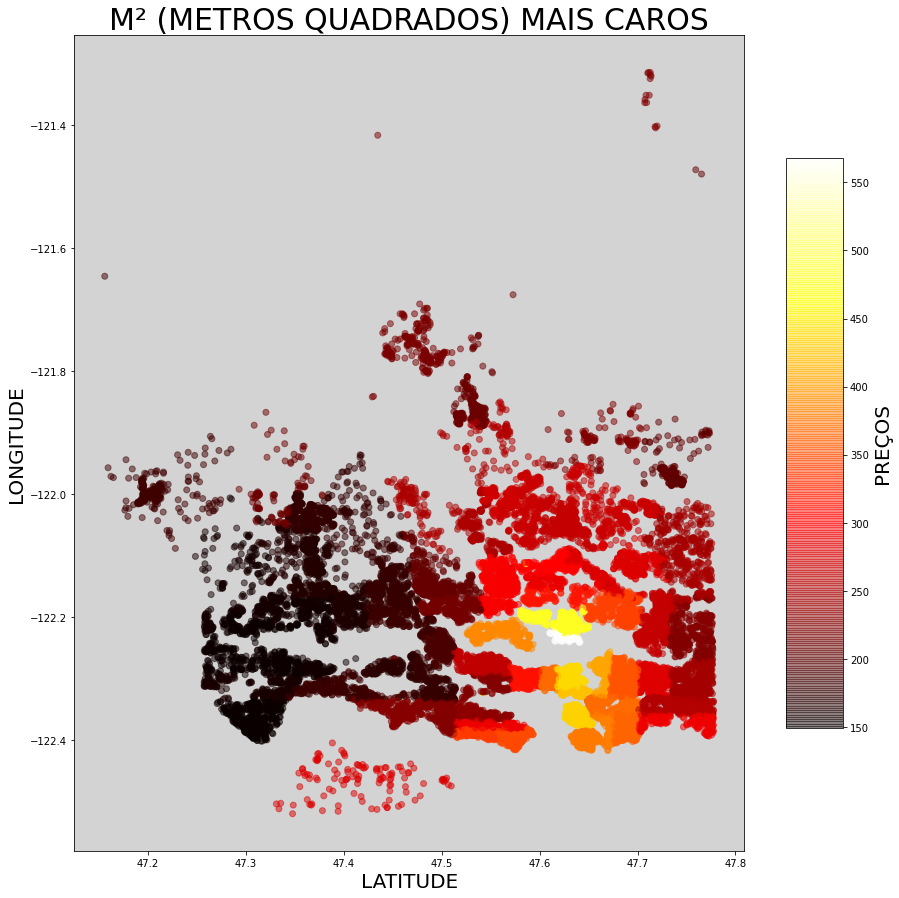

In [52]:
fig = plt.figure(figsize=(15,15)) # aqui verificamos pela lat x long as casas com as localizaçãos de m² mais caras.
im = fig.patch
im.set_facecolor('white')

cor =  dados_selec['mean_zip']
mapa = plt.cm.get_cmap('hot')

plt.xlabel('LATITUDE', fontsize = 20)
plt.ylabel('LONGITUDE', fontsize = 20)
plt.title('M² (METROS QUADRADOS) MAIS CAROS',fontsize = 30)

ax = plt.gca()
ax.set_facecolor('lightgray')


plt.scatter(dados_selec['lat'],dados_selec['long'], alpha = 0.5, c = cor, cmap = mapa)



barra = plt.colorbar(orientation='vertical',shrink=0.7,aspect=10)
barra.set_label(label='PREÇOS',size=20)



plt.show()

No gráfico acima vemos a coloração baseada na faixa de preços, sendo o mais claro, mais caro.

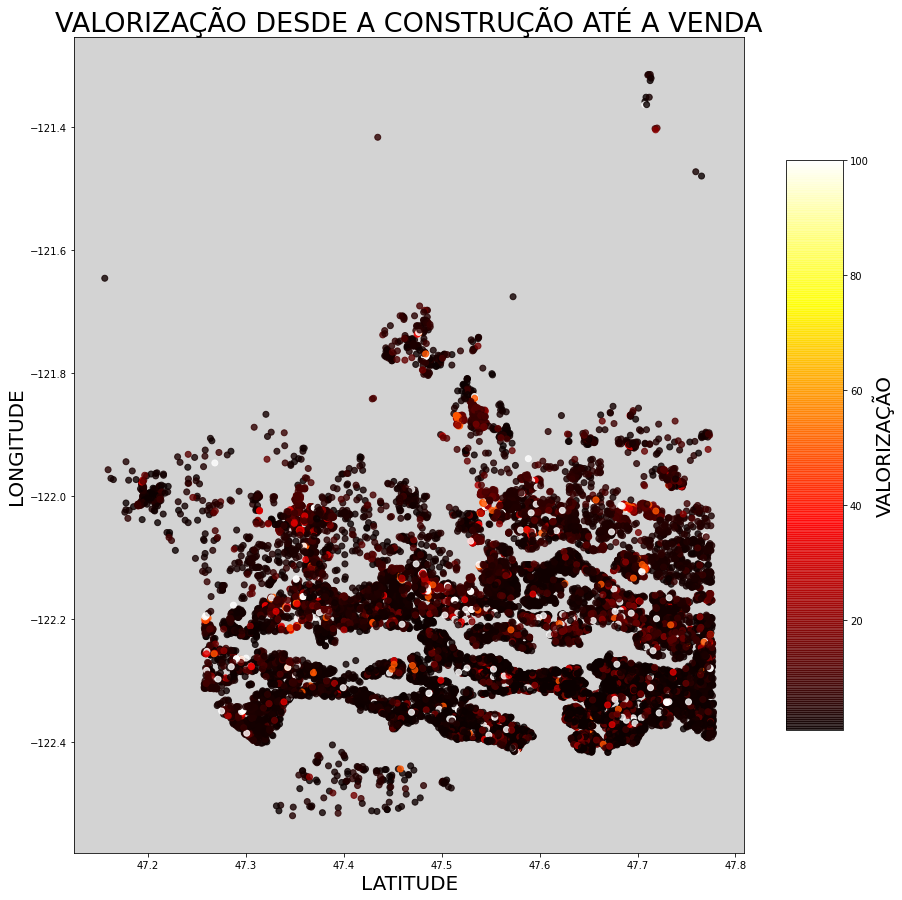

In [53]:
plt.figure(figsize=(15,15)) #aqui verificamos pela lat x long as casas com as valorizações anuais mais altas.
im = fig.patch
im.set_facecolor('white')

cor =  dados_selec['Valoriz_y']
mapa = plt.cm.get_cmap('hot')


plt.xlabel('LATITUDE', fontsize = 20)
plt.ylabel('LONGITUDE', fontsize = 20)
plt.title('VALORIZAÇÃO DESDE A CONSTRUÇÃO ATÉ A VENDA',fontsize = 27)

ax = plt.gca()
ax.set_facecolor('lightgray')

plt.scatter(dados_selec['lat'],dados_selec['long'], alpha = 0.8, c = cor, cmap = mapa)

barra = plt.colorbar(orientation='vertical',shrink=0.7,aspect=10)
barra.set_label(label='VALORIZAÇÃO',size=20)



plt.show()

No gráfico acima vemos que a valorização de cada imóvel é bem dispersada pelo espaço selecionado.

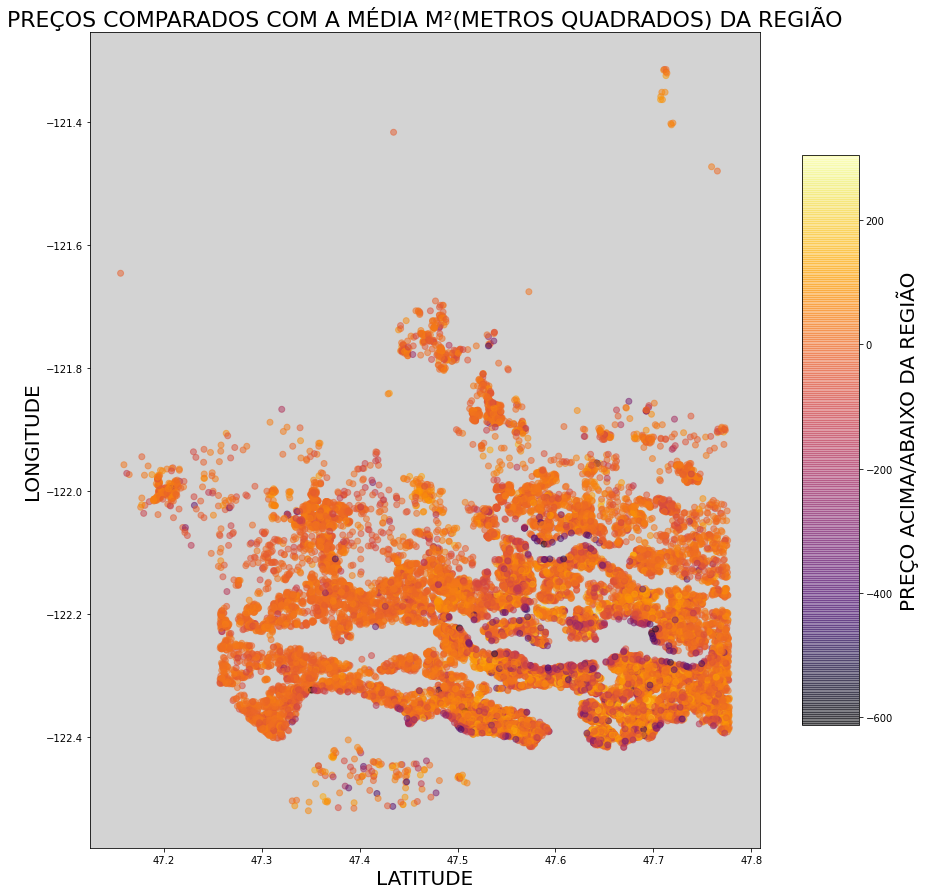

In [54]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.figure(figsize=(15,15)) # aqui verificamos pela lat x long as casas que possuem o m² mais caro e mais barato que a média da região.
im = fig.patch
im.set_facecolor('white')

cor =  dados_selec['dist_price_mean']
# mapa = plt.cm.get_cmap('winter')

plt.xlabel('LATITUDE', fontsize = 20)
plt.ylabel('LONGITUDE', fontsize = 20)
plt.title('PREÇOS COMPARADOS COM A MÉDIA M²(METROS QUADRADOS) DA REGIÃO',fontsize = 22)

# hsv_modified = plt.cm.get_cmap('hot',256)
# newcmp = ListedColormap(hsv_modified((0.1,0.5,0.9)))

ax = plt.gca()
ax.set_facecolor('lightgray')

plt.scatter(dados_selec['lat'],dados_selec['long'], alpha = 0.5, c = cor, cmap = 'inferno')

barra = plt.colorbar(orientation='vertical',shrink=0.7,aspect=10)
barra.set_label(label='PREÇO ACIMA/ABAIXO DA REGIÃO',size=20)



plt.show()

Neste último gráfico, que os imóveis mais caros,.

In [55]:
#Vemos que as zonas claras são as melhores oportunidades de compra, tendo em vista o preço estar abaixo da média da região.

In [56]:
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299,181.806440,2.040816,69.866141
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000,175.372532,1.388889,75.372532
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725,186.046512,223.084512,0.980392,37.038000
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000,110.958904,175.372532,1.388889,64.413628
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667,95.348837,225.491431,1.666667,130.142594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667,668.750000,475.435611,16.666667,-193.314389
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462,605.434783,568.083350,7.692308,-37.351433
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615,696.157735,568.083350,7.692308,-128.074385
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189,703.436255,475.435611,1.351351,-228.000644


#Grupamento 6 - Seleção dos imóveis a indicação

In [57]:
dados_selec['mean_zip'].max()

568.0833501011733

In [58]:
dados_selec['mean_zip'].min()

148.91982870319703

In [59]:
dados_selec['dist_price_mean'].max()

305.4540448031928

In [60]:
dados_selec['dist_price_mean'].min()

-613.2380568781132

In [61]:
dados_selec.sort_values(by=('Valoriz_y'), ascending = False).head(5) #aqui tenho as mais valorizadas em menor tempo.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
2811,3915,3830,2014,4.0,9,98053,47.6844,-122.016,2015,963990.0,1,963990.0,246.229885,269.471827,100.0,23.241942
20170,3430,3580,2013,2.0,8,98077,47.7694,-122.064,2014,749950.0,1,749950.0,218.644315,244.278350,100.0,25.634035
363,2110,2040,2013,2.0,8,98033,47.6743,-122.184,2014,604950.0,1,604950.0,286.706161,343.162454,100.0,56.456293
12509,4285,1570,2013,4.0,10,98004,47.6332,-122.199,2014,1890000.0,1,1890000.0,441.073512,475.435611,100.0,34.362099
21463,2330,2300,2013,2.0,7,98042,47.3590,-122.081,2014,337500.0,1,337500.0,144.849785,164.348452,100.0,19.498666


1. **Neste ponto, crio o Data Frame que terá os imóveis que mais valorizaram e que possuam o preço do m² abaixo do preço do metro da região.**

---



In [62]:
dados_selec

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
1149,670,1160,1966,0.0,3,98022,47.2638,-121.906,2015,75000.0,49,1530.612245,111.940299,181.806440,2.040816,69.866141
15293,780,1700,1942,1.0,5,98168,47.4739,-122.280,2014,78000.0,72,1083.333333,100.000000,175.372532,1.388889,75.372532
465,430,1200,1912,1.0,4,98014,47.6499,-121.909,2014,80000.0,102,784.313725,186.046512,223.084512,0.980392,37.038000
16198,730,860,1943,1.0,5,98168,47.4808,-122.315,2015,81000.0,72,1125.000000,110.958904,175.372532,1.388889,64.413628
8274,860,1140,1954,1.0,6,98146,47.4987,-122.341,2014,82000.0,60,1366.666667,95.348837,225.491431,1.666667,130.142594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8000,4600,2009,5.0,12,98004,47.6232,-122.220,2015,5350000.0,6,891666.666667,668.750000,475.435611,16.666667,-193.314389
4411,9200,3560,2001,6.0,13,98039,47.6289,-122.233,2014,5570000.0,13,428461.538462,605.434783,568.083350,7.692308,-37.351433
9254,9890,4540,2001,8.0,13,98039,47.6305,-122.240,2014,6885000.0,13,529615.384615,696.157735,568.083350,7.692308,-128.074385
3914,10040,3930,1940,4.0,11,98004,47.6500,-122.214,2014,7062500.0,74,95439.189189,703.436255,475.435611,1.351351,-228.000644


In [63]:
media_regiao_asc = dados_selec['dist_price_mean'].sort_values(ascending=False) # crio uma variável apenas para visualizar os imóveis com preço abaixo da média.

In [64]:
media_regiao_asc #apenas para visualizar os que mais compensam

14835    305.454045
3844     292.719377
11436    287.016060
16931    285.755667
9417     271.227158
            ...    
656     -515.218235
1081    -528.218776
4013    -531.360154
8623    -567.191496
18597   -613.238057
Name: dist_price_mean, Length: 21171, dtype: float64

In [65]:
# Neste ponto, crio a variável que terá os imóveis que mais valorizaram e que possuam o preço do m² abaixo do preço do metro da região.
# Organizando em ordem dos que mais valorizaram ao longo do tempo.

valor_tempo = dados_selec[(dados_selec['price_m2'] < dados_selec['mean_zip'])].sort_values(by=('Valoriz_y'), ascending = False)

In [66]:
valor_tempo 
# Data Frame que mostra os imóveis que mais valorizaram ao longo do tempo, em ordem do melhor para o pior.
# Sendo o melhor: o que mais valorizou por ano, e o pior: o que menos valorizou por ano.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
19972,3444,2848,2014,3.0,8,98023,47.2966,-122.348,2015,430236.0,1,430236.000000,124.923345,148.919829,100.000000,23.996484
19811,3970,3560,2014,4.0,9,98074,47.6173,-122.056,2015,949990.0,1,949990.000000,239.292191,265.671342,100.000000,26.379151
20669,2680,2680,2013,2.0,8,98045,47.4759,-121.734,2014,449990.0,1,449990.000000,167.906716,220.464528,100.000000,52.557811
19768,2240,2240,2014,2.0,8,98001,47.2911,-122.266,2015,331210.0,1,331210.000000,147.861607,151.387938,100.000000,3.526330
19890,2990,2730,2014,3.0,8,98059,47.4853,-122.154,2015,559950.0,1,559950.000000,187.274247,207.242346,100.000000,19.968098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2020,1290,1900,3.0,6,98107,47.6653,-122.372,2015,565000.0,115,4913.043478,279.702970,382.951975,0.869565,103.249005
8858,1780,1750,1900,2.0,6,98010,47.3124,-122.003,2015,200000.0,115,1739.130435,112.359551,210.095356,0.869565,97.735805
11610,2120,1830,1900,2.0,8,98122,47.6024,-122.296,2015,625000.0,115,5434.782609,294.811321,367.514177,0.869565,72.702856
3882,1122,1610,1900,1.0,5,98118,47.5135,-122.257,2015,265000.0,115,2304.347826,236.185383,263.255498,0.869565,27.070115




---


**Agora, com os mais valorizados em ordem, crio uma organização para exibir em ordem de melhor negócio.**

**Sendo melhor negócio aqueles que possuem alta taxa de valorização com preço do m² abaixo do preço da região(zipcode).**

In [67]:
valor_tempo.sort_values(by=('dist_price_mean'),ascending=False) 
#agora, com os mais valorizados em ordem, crio uma organização para exibir em ordem de melhor negócio.
#sendo melhor negócio aqueles que possuem alta taxa de valorização com preço do m² abaixo do preço médio da região(zipcode).

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
14835,2370,1590,1987,2.0,9,98119,47.6503,-122.366,2015,300523.0,28,10732.964286,126.802954,432.256998,3.571429,305.454045
3844,1540,1220,2007,4.0,7,98109,47.5420,-122.322,2014,216650.0,7,30950.000000,140.681818,433.401195,14.285714,292.719377
11436,1480,1140,2007,4.0,7,98109,47.5421,-122.322,2014,216650.0,7,30950.000000,146.385135,433.401195,14.285714,287.016060
16931,3990,2090,1962,2.0,8,98112,47.6236,-122.299,2014,610000.0,52,11730.769231,152.882206,438.637872,1.923077,285.755667
9417,2240,1470,1954,2.0,7,98112,47.6191,-122.296,2015,375000.0,61,6147.540984,167.410714,438.637872,1.639344,271.227158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,1520,1590,1967,2.0,7,98059,47.4730,-122.149,2015,314950.0,48,6561.458333,207.203947,207.242346,2.083333,0.038398
720,1670,2390,2002,2.0,7,98038,47.3668,-122.031,2014,289950.0,12,24162.500000,173.622754,173.656235,8.333333,0.033480
3106,1770,2010,1954,2.0,7,98133,47.7703,-122.343,2014,449500.0,60,7491.666667,253.954802,253.980627,1.666667,0.025825
13546,2390,2560,1989,3.0,9,98038,47.3706,-122.056,2015,415000.0,26,15961.538462,173.640167,173.656235,3.846154,0.016067


In [68]:
# Neste ponto, crio a variável que terá os imóveis que menos valorizaram e que possuam o preço do m² acima do preço do metro da região.
# Organizando em ordem dos que menos valorizaram ao longo do tempo.
desvalor_tempo = dados_selec[(dados_selec['price_m2'] > dados_selec['mean_zip'])].sort_values(by=('Valoriz_y'))

In [69]:
desvalor_tempo
# Data Frame que mostra os imóveis que menos valorizaram ao longo do tempo, em ordem do pior para o melhor.
#Sendo o melhor: o que mais valorizou por ano, e o pior: o que menos valorizou por ano.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
6138,1020,1240,1900,1.0,7,98108,47.5254,-122.318,2015,337500.0,115,2.934783e+03,330.882353,224.443286,0.869565,-106.439067
15046,2240,2120,1900,2.0,8,98122,47.6027,-122.295,2015,905000.0,115,7.869565e+03,404.017857,367.514177,0.869565,-36.503680
4438,1300,2510,1900,1.0,7,98119,47.6345,-122.366,2015,819000.0,115,7.121739e+03,630.000000,432.256998,0.869565,-197.743002
14536,1410,1660,1900,2.0,7,98108,47.5541,-122.317,2015,415000.0,115,3.608696e+03,294.326241,224.443286,0.869565,-69.882956
2977,1090,1390,1900,2.0,7,98103,47.6652,-122.338,2015,685000.0,115,5.956522e+03,628.440367,369.841013,0.869565,-258.599354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20163,2050,2340,2014,2.0,9,98038,47.3448,-122.024,2015,383000.0,1,3.830000e+05,186.829268,173.656235,100.000000,-13.173034
19784,2230,2230,2014,2.0,8,98133,47.7300,-122.335,2015,679950.0,1,6.799500e+05,304.910314,253.980627,100.000000,-50.929687
3748,4430,2470,2013,4.0,10,98004,47.6168,-122.216,2014,2450000.0,1,2.450000e+06,553.047404,475.435611,100.000000,-77.611793
21192,2920,2930,2013,2.0,9,98059,47.4855,-122.149,2014,675900.0,1,6.759000e+05,231.472603,207.242346,100.000000,-24.230257


In [70]:
desvalor_tempo.sort_values(by=('dist_price_mean')) 
#agora, com os menos valorizados em ordem, crio uma organização para exibir em ordem de pior negócio.
#sendo pior negócio aqueles que possuem baixa taxa de valorização com preço do m² acima do preço médio da região(zipcode).

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
18597,720,1120,1905,1.0,6,98198,47.3509,-122.323,2015,570000.0,110,5181.818182,791.666667,178.428610,0.909091,-613.238057
8623,410,1190,1953,1.0,4,98146,47.5077,-122.357,2015,325000.0,62,5241.935484,792.682927,225.491431,1.612903,-567.191496
4013,3000,3000,2001,2.0,11,98075,47.5884,-122.086,2014,2400000.0,13,184615.384615,800.000000,268.639846,7.692308,-531.360154
1081,1150,2440,1908,1.0,6,98178,47.5020,-122.222,2014,825000.0,106,7783.018868,717.391304,189.172528,0.943396,-528.218776
656,3930,2730,1957,2.0,8,98034,47.7022,-122.224,2014,3070000.0,57,53859.649123,781.170483,265.952248,1.754386,-515.218235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13202,1210,2250,1940,1.0,7,98042,47.3752,-122.166,2014,198900.0,74,2687.837838,164.380165,164.348452,1.351351,-0.031713
19489,1460,2050,1950,2.0,7,98103,47.6928,-122.339,2014,540000.0,64,8437.500000,369.863014,369.841013,1.562500,-0.022001
6996,2070,1880,2013,2.0,8,98038,47.3545,-122.056,2015,359500.0,2,179750.000000,173.671498,173.656235,50.000000,-0.015263
3087,1270,1270,1993,2.0,8,98045,47.4639,-121.744,2014,280000.0,21,13333.333333,220.472441,220.464528,4.761905,-0.007913


#Grupamento 7 - Os indicados:

**O tratamento realizado, portanto, indica esses imóveis para investimento, com base nos seguintes critérios:**

1. Primeiramente filtrei os que mais valorizaram, ou seja, de sua construção até sua venda, quanto rendeu a cada ano, dividindo o preço pela idade.

2. Em seguida, sem desconsiderar o filtro anterior, filtrei novamente, seguindo o critério de preços ABAIXO da média da região (com a coluna 'dist_price_mean' POSITIVA), que seriam, portanto, mais baratos em vista de seus vizinhos de padrão aprox. de qualidade.

1. Os não indicados, portanto, são o exato contráro disto. Ou seja, que menos valorizaram com o passar do tempo e que possuem o preço do m² bem acima da média da região.

1. Foi realizado também os mesmos cálculos da mediana no lugar da média da região, e verifiquei diferença irrelevante.

1. **Todos com os itens que possuem correlações com os preços altos em quantidade considerável. Portanto, mais valorizados.**

In [74]:
indicados = valor_tempo.sort_values(by=('dist_price_mean'),ascending=False).head()
indicados
# Estes seriam então os indicados para compra.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
14835,2370,1590,1987,2.0,9,98119,47.6503,-122.366,2015,300523.0,28,10732.964286,126.802954,432.256998,3.571429,305.454045
3844,1540,1220,2007,4.0,7,98109,47.5420,-122.322,2014,216650.0,7,30950.000000,140.681818,433.401195,14.285714,292.719377
11436,1480,1140,2007,4.0,7,98109,47.5421,-122.322,2014,216650.0,7,30950.000000,146.385135,433.401195,14.285714,287.016060
16931,3990,2090,1962,2.0,8,98112,47.6236,-122.299,2014,610000.0,52,11730.769231,152.882206,438.637872,1.923077,285.755667
9417,2240,1470,1954,2.0,7,98112,47.6191,-122.296,2015,375000.0,61,6147.540984,167.410714,438.637872,1.639344,271.227158


In [89]:
print(f'O imóvel na posição 14835 é o id: {dados.iloc[14835]["id"]}')
print(f'O imóvel na posição 3844 é o id: {dados.iloc[3844]["id"]}')
print(f'O imóvel na posição 11436 é o id: {dados.iloc[11436]["id"]}')
print(f'O imóvel na posição 16931 é o id: {dados.iloc[16931]["id"]}')
print(f'O imóvel na posição 9417 é o id: {dados.iloc[9417]["id"]}')

O imóvel na posição 14835 é o id: 3613600150
O imóvel na posição 3844 é o id: 2734100734
O imóvel na posição 11436 é o id: 2734100732
O imóvel na posição 16931 é o id: 5016002275
O imóvel na posição 9417 é o id: 9828701565


In [75]:
n_indicados = desvalor_tempo.sort_values(by=('dist_price_mean')).head() 
n_indicados
# Estes seriam os que de forma alguma  deveriam ser indicados para compra.

,sqft_living,sqft_living15,yr_built,bathrooms,grade,zipcode,lat,long,date,price,qtd_anos,valor_cresc,price_m2,mean_zip,Valoriz_y,dist_price_mean
18597,720,1120,1905,1.0,6,98198,47.3509,-122.323,2015,570000.0,110,5181.818182,791.666667,178.428610,0.909091,-613.238057
8623,410,1190,1953,1.0,4,98146,47.5077,-122.357,2015,325000.0,62,5241.935484,792.682927,225.491431,1.612903,-567.191496
4013,3000,3000,2001,2.0,11,98075,47.5884,-122.086,2014,2400000.0,13,184615.384615,800.000000,268.639846,7.692308,-531.360154
1081,1150,2440,1908,1.0,6,98178,47.5020,-122.222,2014,825000.0,106,7783.018868,717.391304,189.172528,0.943396,-528.218776
656,3930,2730,1957,2.0,8,98034,47.7022,-122.224,2014,3070000.0,57,53859.649123,781.170483,265.952248,1.754386,-515.218235


In [87]:
print(f'O imóvel na posição 18597 é o id: {dados.iloc[18597]["id"]}')
print(f'O imóvel na posição 8623 é o id: {dados.iloc[8623]["id"]}')
print(f'O imóvel na posição 4013 é o id: {dados.iloc[4013]["id"]}')
print(f'O imóvel na posição 1081 é o id: {dados.iloc[1081]["id"]}')
print(f'O imóvel na posição 656 é o id: {dados.iloc[656]["id"]}')

O imóvel na posição 18597 é o id: 3222049087
O imóvel na posição 8623 é o id: 6303400395
O imóvel na posição 4013 é o id: 724069059
O imóvel na posição 1081 é o id: 7567600045
O imóvel na posição 656 é o id: 3760500116


In [76]:
indicados.rename(columns={'sqft_living': 'Área_habitável', 'sqft_living15': 'Média_área_hab_região', 'yr_built':'Ano_construção','bathrooms':'Banheiros','grade':'Qualidade_Material','date':'Data_venda','price':'Preço','qtd_anos':'idade_do_imóvel','price_m2':'Preço_Metro²','mean_zip':'Preço_Metro²_região','Valoriz_y':'Valorização_anual','dist_price_mean':'Diferença de preço da região'})

,Área_habitável,Média_área_hab_região,Ano_construção,Banheiros,Qualidade_Material,zipcode,lat,long,Data_venda,Preço,idade_do_imóvel,valor_cresc,Preço_Metro²,Preço_Metro²_região,Valorização_anual,Diferença de preço da região
14835,2370,1590,1987,2.0,9,98119,47.6503,-122.366,2015,300523.0,28,10732.964286,126.802954,432.256998,3.571429,305.454045
3844,1540,1220,2007,4.0,7,98109,47.5420,-122.322,2014,216650.0,7,30950.000000,140.681818,433.401195,14.285714,292.719377
11436,1480,1140,2007,4.0,7,98109,47.5421,-122.322,2014,216650.0,7,30950.000000,146.385135,433.401195,14.285714,287.016060
16931,3990,2090,1962,2.0,8,98112,47.6236,-122.299,2014,610000.0,52,11730.769231,152.882206,438.637872,1.923077,285.755667
9417,2240,1470,1954,2.0,7,98112,47.6191,-122.296,2015,375000.0,61,6147.540984,167.410714,438.637872,1.639344,271.227158


In [ ]:
#Foi realizado também os mesmos cálculos da mediana no lugar da média da região, conclui diferença irrelevante.